 ## Import data and python packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
# Import data yang dibutuhkan
df = pd.read_csv("telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Melihat jumlah baris dan kolom
df.shape

(3333, 11)

In [4]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


Dari info tersebut terlihat bahwa tidak ada data yang Null serta seluruh data memiliki tipe numeric

## Mengecek Outlier

In [6]:
# Mengecek outlier
import scipy.stats as stats
df[(np.abs(stats.zscore(df)) > 3).all(axis=1)]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins


Tidak terdapat outliers pada data tersebut. Selain itu, seluruh data yang ada juga dapat dijelaskan.

## Exploratory Data Analysis 

Sekarang kita akan menemukan dan melihat hubungan apa yang bisa dianalisis dengan variabel-variabelnya. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

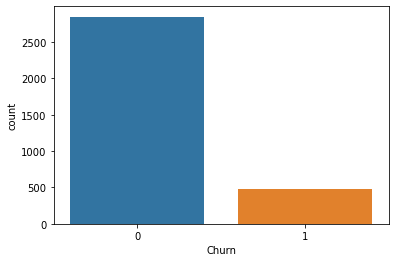

In [7]:
sns.countplot(df['Churn'])

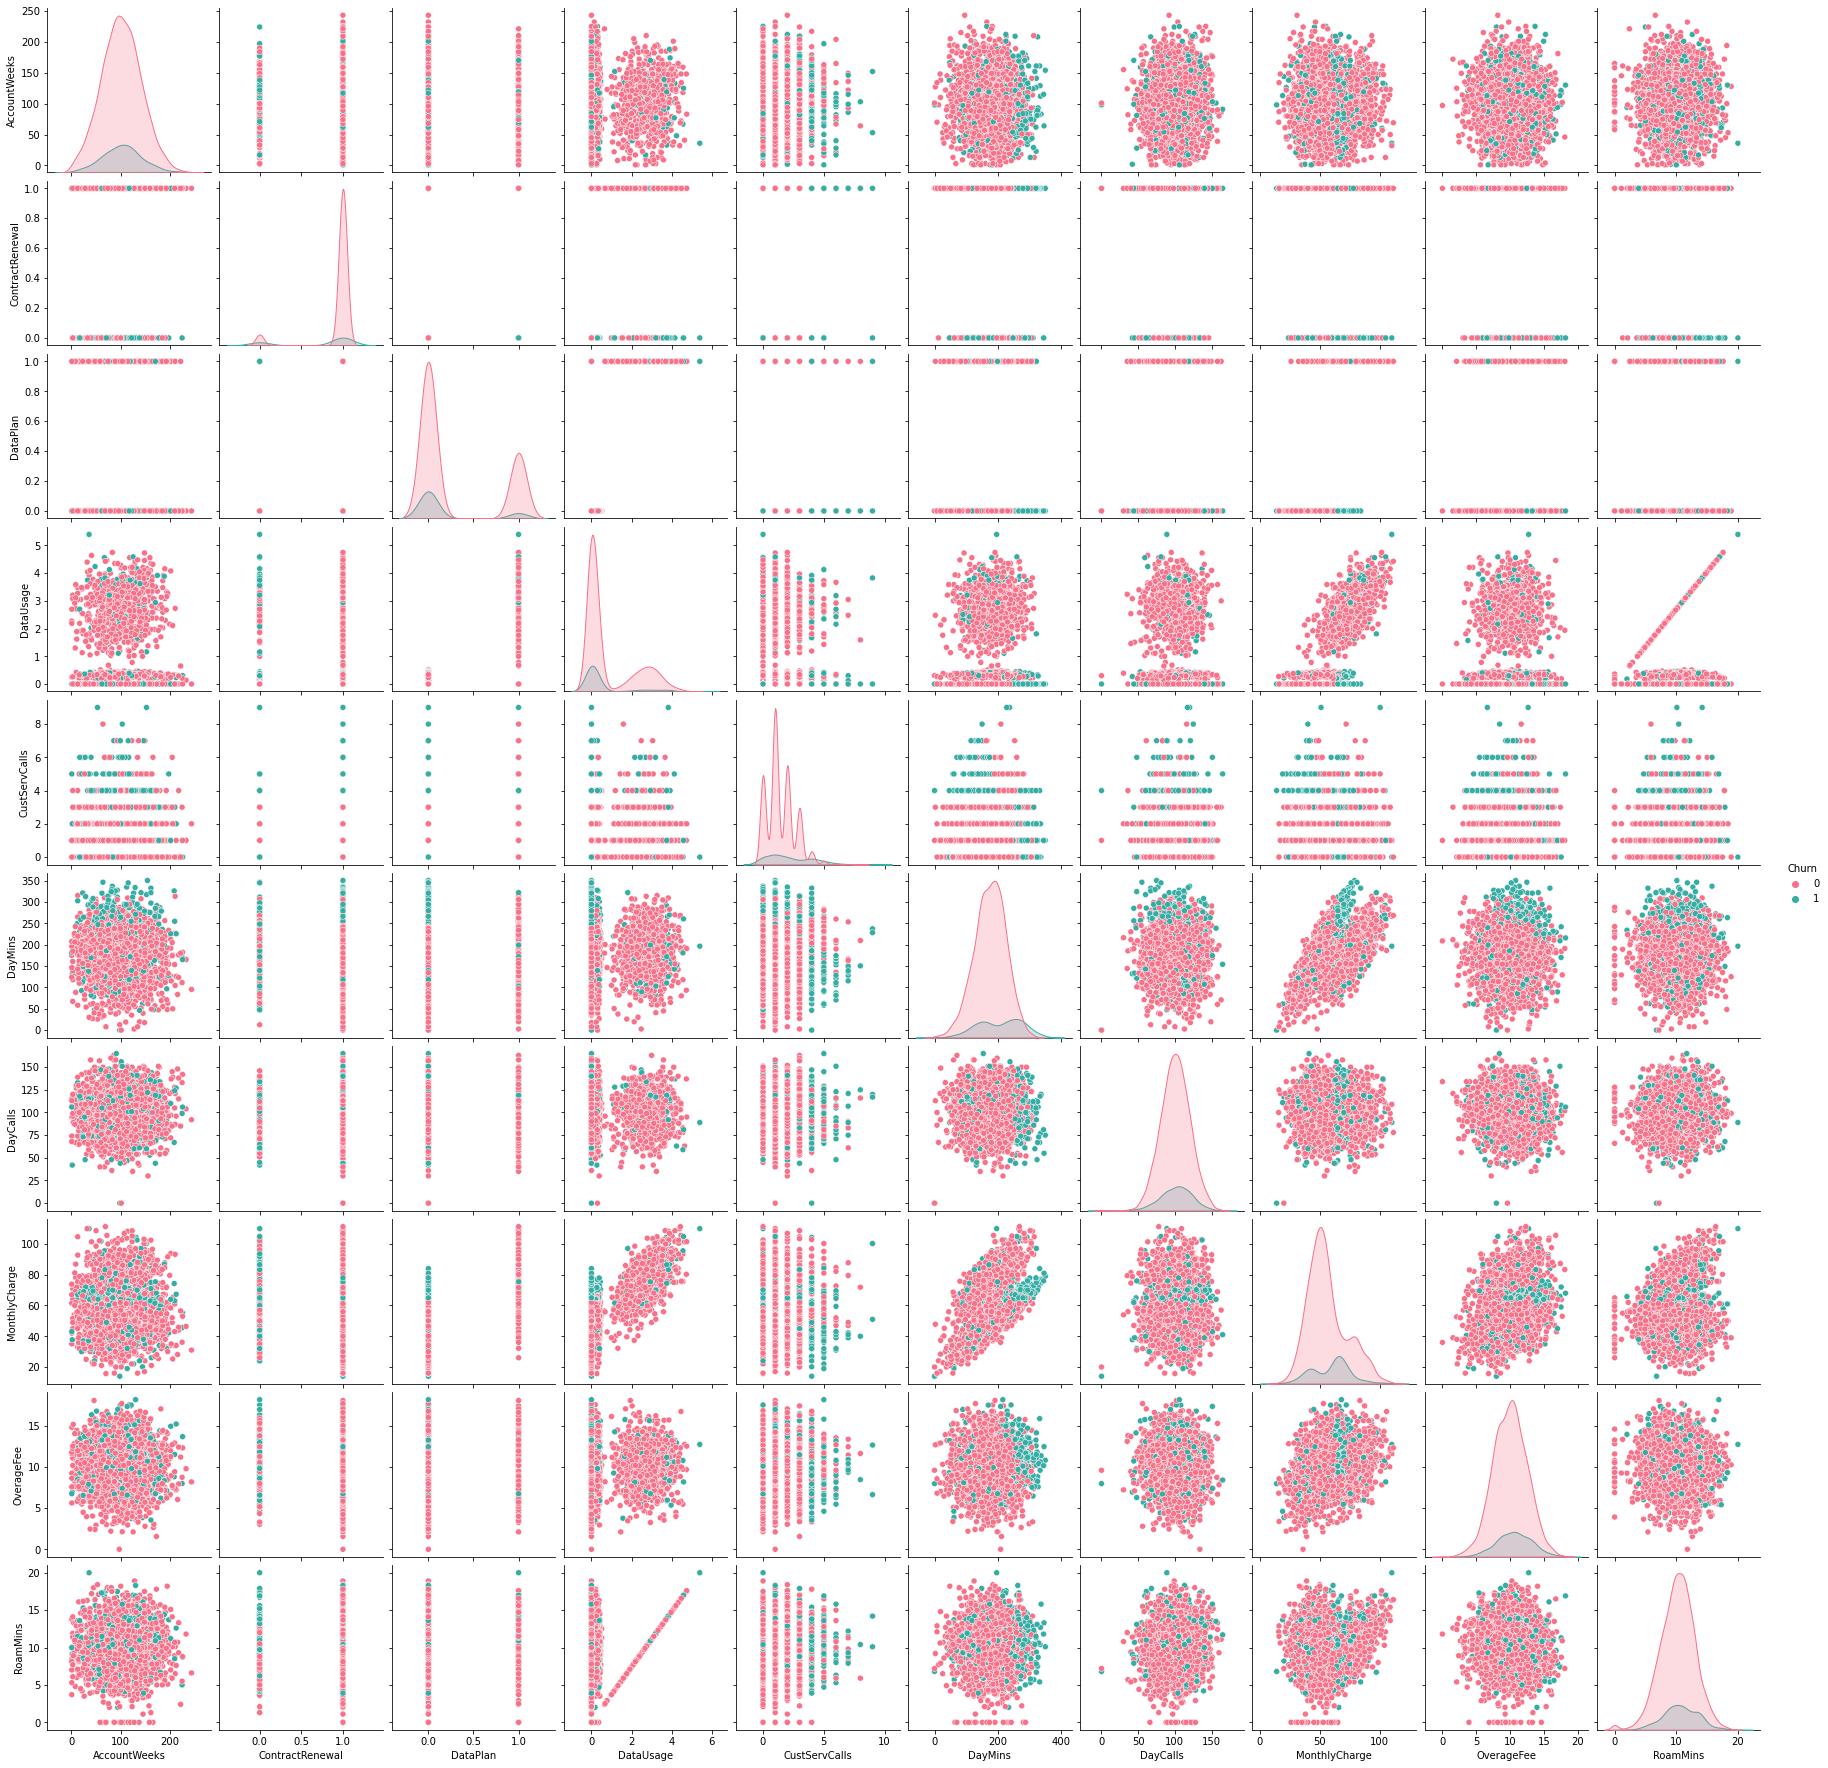

In [8]:
import seaborn as sns
sns.pairplot(df, hue="Churn", palette="husl")

## Hasil dari Density graph:

1. Daymins dan MonthlyCharge akan berguna untuk memisahkan kelompok
2. DataUsage mempunyai banyak nilai di angka 0 dan memiliki hubungan linear dengan RoamMins
3. CustServCalls memiliki nilai paling tinggi di angka 2


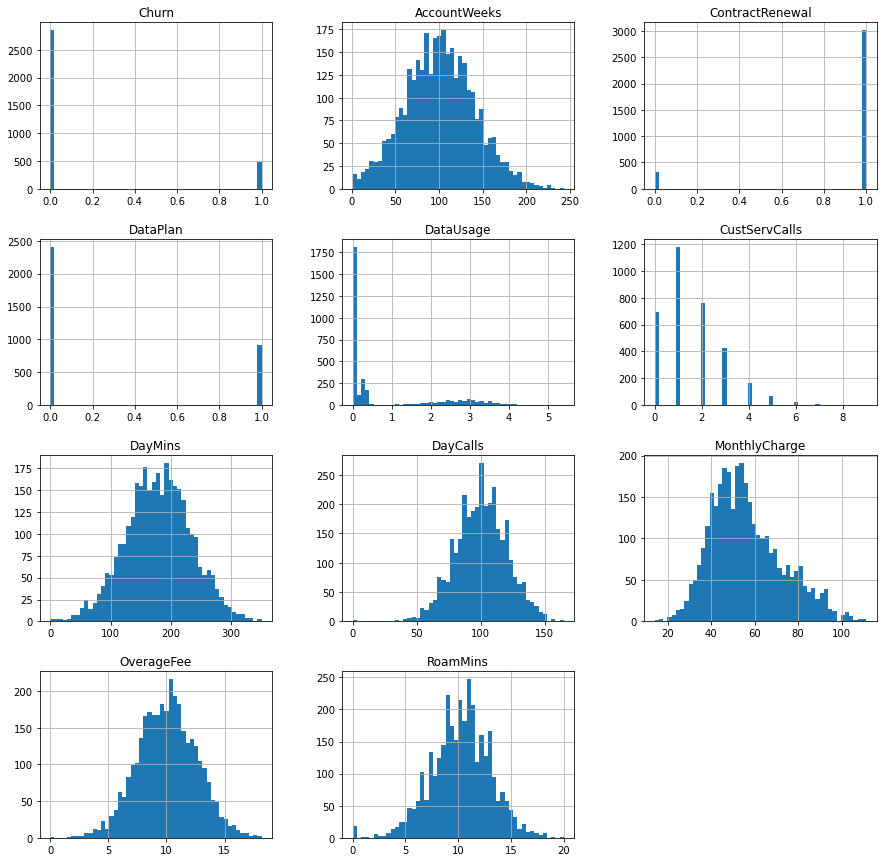

In [9]:
df.hist(
    figsize=(15,15)
    , bins=50
);

## Hasil dari Histogram graph:

kolom diatas terlihat rata-rata terdistribusi normal (gaussian), tidak perlu log transform

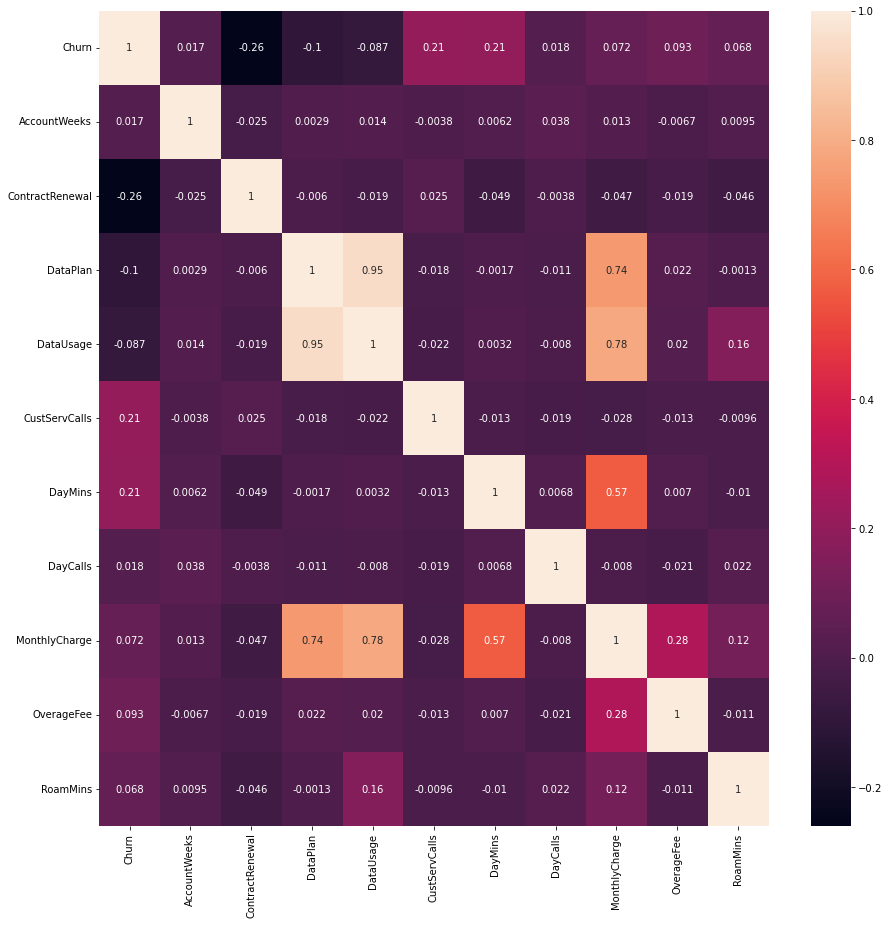

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(
    df.corr()
    , annot=True
);

## Hasil dari Matrix Plot Heatmap
Dapat dilihat pada matrix plot diatas, terdapat korelasi yang kuat antara DataUsage dan DataPlan. Dimana jika kita menggunakan data, itu berarti ada penggunaan data. Korelasi selanjutnya yaitu antara (DataUsage, DataPlan, DayMins) dan MonthlyCharge. Korelasi kuat yang selanjutnya yaitu antara MonthlyCharge dan OverageFee.

In [11]:
for a_col in ['DataPlan', 'DataUsage', 'MonthlyCharge', 'DayMins', 'OverageFee']:
    print(f'{a_col} correlation to "Churn" is {df[a_col].corr(df["Churn"])}')

DataPlan correlation to "Churn" is -0.10214814067014691
DataUsage correlation to "Churn" is -0.0871945089306983
MonthlyCharge correlation to "Churn" is 0.07231271096701478
DayMins correlation to "Churn" is 0.20515082926139022
OverageFee correlation to "Churn" is 0.09281242645953186


# Target variable: "churn"

In [12]:
# Mengecek proporsi data pada kolom 'Churn'
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

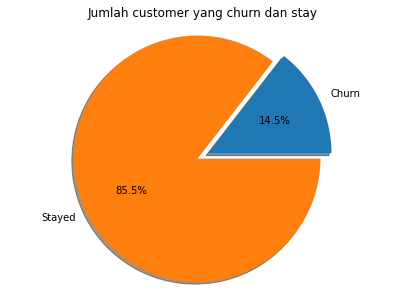

In [13]:
#default churn rate
labels = 'Churn', "Stayed"
sizes = [df.Churn[df['Churn'] == 1].count(), df.Churn[df['Churn'] == 0].count()]
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.title("Jumlah customer yang churn dan stay")

plt.show()


## seberapa besar sih tingkat proporsi konsumen yang membatalkan service??

#### Dapat dilihat pada visualisasi diatas, dataset yang sangat tidak seimbang  akan menghasilkan model yang bias terhadap 'Churn'.
85% customer stayed atau masih tetap menggunakan jasa dan 14,5% lainnya "churn"

## Jadi, faktor apakah yang menyebabkan Churn?

mari kita lihat satu-satu!

# 1. Churn oleh Renewal Contract, Data Plan dan Cust Service Call 

Kolom 'ContractRenewal' menjelaskan apakah customer memperbaharui kontrak mereka (1) atau tidak (0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

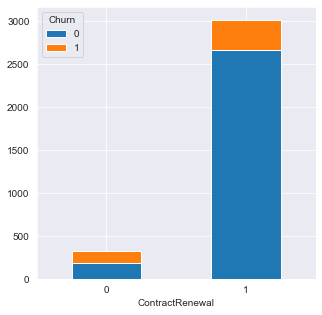

In [14]:
# Create barchart for 'ContractRenewal'
sns.set_style("darkgrid")
df_plot = df.groupby(['Churn', 'ContractRenewal']).size().reset_index().pivot(columns = 'Churn', index = 'ContractRenewal', values = 0)
df_plot.plot(kind = 'bar', stacked = True, figsize = (5, 5))
plt.xticks(rotation = 0)

####  Contract Renewal:

1. 90% dari customer memperbaharui kontrak
2. kita dapat melihat persentase churn pada bagian yang memperbaharui kontrak lebih tinggi dibandingkan churn yang berada di "tidak memperbaharui kontrak (0)"

Kolom 'DataPlan' menjelaskan apakah customer mempunyai data plan (1) atau tidak (0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

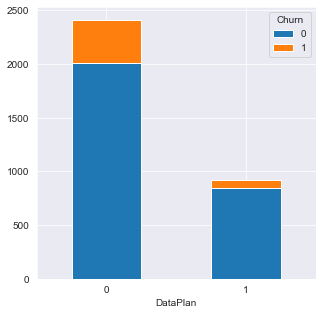

In [15]:
# Create barchart for 'DataPlan'
df_plot = df.groupby(['Churn', 'DataPlan']).size().reset_index().pivot(columns = 'Churn', index = 'DataPlan', values = 0)
df_plot.plot(kind = 'bar', stacked = True, figsize = (5,5))
plt.xticks(rotation = 0) 

####  Data Plan:

1. 70% dari customer tidak mempunyai data plan (0)
2. pada grup yang tidak mempunyai data plan (0) churnnya lebih tinggi dibanding yang mempunyai data plan
3. 0 di DataUsage kemungkinan banyak karena faktor customer di grup "no data plan)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

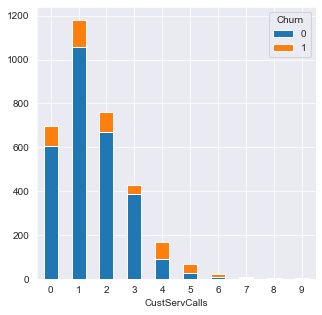

In [16]:
# Create barchart for 'DataPlan'
df_plot = df.groupby(['Churn', 'CustServCalls']).size().reset_index().pivot(columns = 'Churn', index = 'CustServCalls', values = 0)
df_plot.plot(kind = 'bar', stacked = True, figsize = (5,5))
plt.xticks(rotation = 0) 

####  Customer Service Calls:

1. Kebanyakan user membuat telfon ke CS sekali, hanya sebagian kecil user yang membuat telfon ke CS lebih dari 4 kali

## Relationship: 'DataPlan' & 'DataUsage' & 'Churn'

 pada matrix plot Heatmap, terdapat korelasi yang kuat antara DataUsage dan DataPlan.
 (0) tidak mempunyai data plan
 (1) terdapat data plan

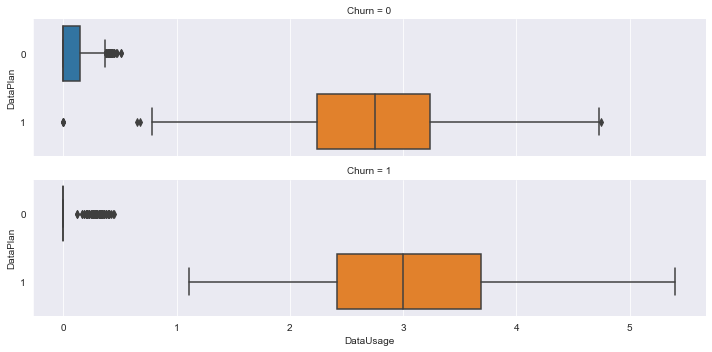

In [17]:
# membuat boxplots
sns.catplot(x = 'DataUsage', y = 'DataPlan', row = 'Churn',
            kind = 'box', orient = 'h', height = 2.5, aspect = 4,
            data = df)

###### Relationship 
customer yang mempunya data plan lebih mempunyai penggunaan data rata-rata daripada yang tidak. 

Dapat dilihat, customer yang membatalkan layanan menggunakan rata-rata data lebih banyak daripada yang tidak membatalkan layanan.

## Relationship: 'MonthlyCharges' & 'Daymins' & 'Churn'

 pada matrix plot Heatmap, terdapat korelasi yang kuat antara MonthlyCharge dan Daymins.

<AxesSubplot:xlabel='DayMins', ylabel='MonthlyCharge'>

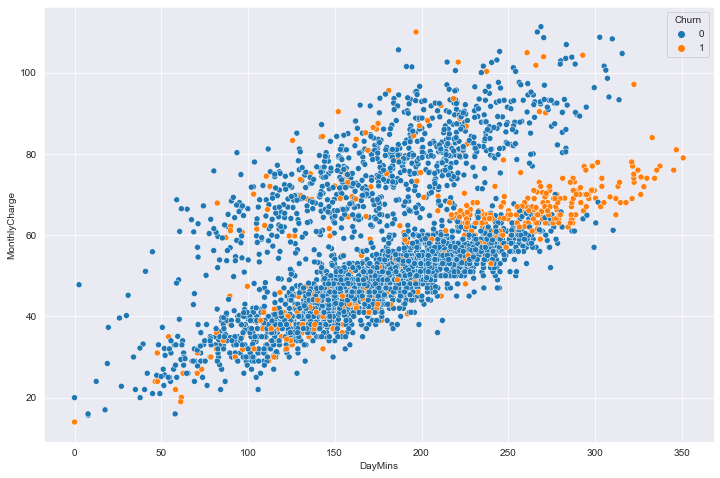

In [18]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'DayMins', y = 'MonthlyCharge', hue = 'Churn')

###### Relationship

Dapat kita lihat pada scatterplot diatas, diantara 60 - 80$ yang dibebankan maka semakin banyak juga rata-rata penggunaan yang juga meninggalkan layanan (dayMins diatas 200)

## Relationship: 'MonthlyCharges' & 'DataPlan' & 'Churn'

 pada matrix plot Heatmap, terdapat korelasi yang kuat antara MonthlyCharge dan Daymins.

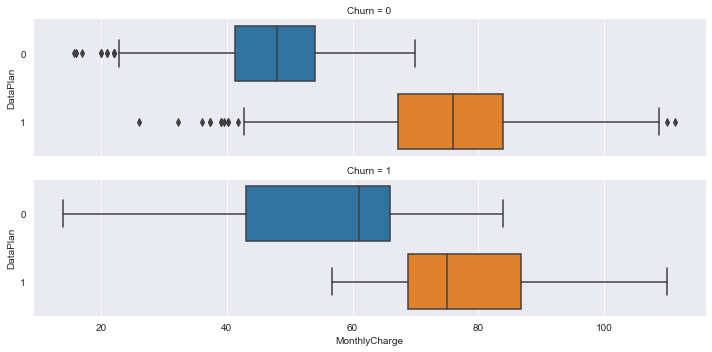

In [19]:
sns.catplot(x = 'MonthlyCharge', y = 'DataPlan', row = 'Churn',
            kind = 'box', orient = 'h', height = 2.5, aspect = 4,
            data = df)

###### Relationship 

Biaya perbulan yang dibebankan untuk yang menggunakan data plan cenderung tinggi. 

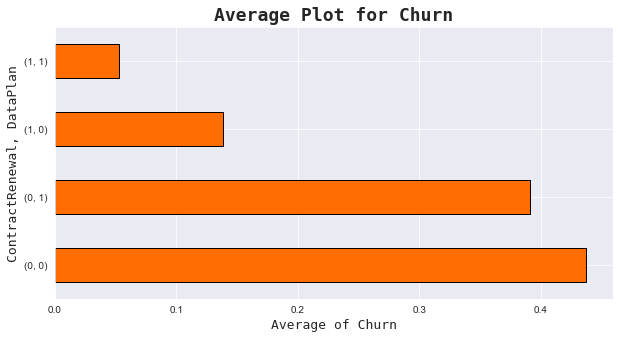

In [20]:
ax = plt.figure(figsize=(10,5))
df.groupby(['ContractRenewal',"DataPlan"])['Churn'].mean().plot(figsize=(10,5),kind="barh",color="#FF6C00",
                                                               edgecolor='k')
plt.title("Average Plot for Churn" , size=18, fontweight='bold', fontfamily='monospace')
plt.ylabel("ContractRenewal, DataPlan",size=13, fontweight='light', fontfamily='monospace')
plt.xlabel("Average of Churn",size=13, fontweight='light', fontfamily='monospace')
plt.grid(True)
plt.show()

## Contract Renewal & Data Plan oleh Churn
Dalam plot diatas bisa diketahui bahwa ContractRenewall dan DataPlan merupakan faktor penting dalam customer churn.
jika kedua atribut tersebut bernilai "1" maka kemungkinan customer churn akan rendah. 
Dari data diatas, Contract Renewal lebih berpengaruh daripada Data Plan.  

## Classification

Melakukan resampling pada data

In [21]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']==0)] 
df_minority = df[(df['Churn']==1)] 
# upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [22]:
df_downsampled["Churn"].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [23]:
df = df_downsampled
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
989,0,178,1,0,0.00,1,275.4,150,63.0,9.38,13.6
1482,0,6,1,0,0.00,3,226.5,93,52.0,7.61,9.4
1291,0,67,1,1,3.92,1,129.6,107,81.2,11.65,14.5
1248,0,101,0,0,0.38,0,193.7,108,52.8,9.33,11.6
1894,0,68,1,0,0.41,3,131.6,89,39.1,6.85,10.2
...,...,...,...,...,...,...,...,...,...,...,...
3301,1,84,1,0,0.00,0,280.0,113,65.0,10.11,10.4
3304,1,71,0,0,0.00,4,186.1,114,49.0,9.93,13.8
3320,1,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7
3322,1,62,1,0,0.00,4,321.1,105,78.0,13.28,11.5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

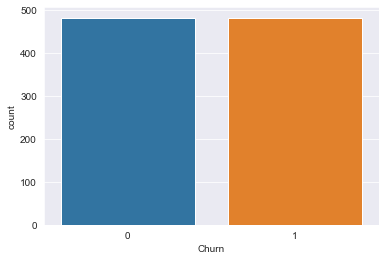

In [24]:
sns.countplot(df['Churn'])

Menentukan kolom target

In [25]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [26]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

### Logistic Regression

In [27]:
# Train Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = lr.fit(X_train, y_train)

In [28]:
# Evaluasi Model
y_lr = lr.predict(X_test)

In [29]:
# Result

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Klasifikasi Model Logistic Regression \n\n\n', classification_report(y_test, y_lr))

Klasifikasi Model Logistic Regression 


               precision    recall  f1-score   support

           0       0.76      0.73      0.74       191
           1       0.75      0.78      0.76       196

    accuracy                           0.75       387
   macro avg       0.75      0.75      0.75       387
weighted avg       0.75      0.75      0.75       387



Confusion Matrix dari Model Logistic Regression 



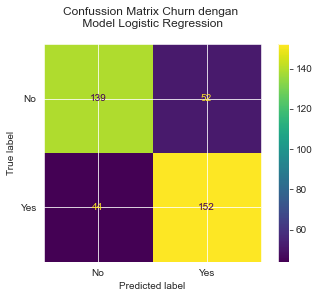

In [30]:
#membuat confusion matrix dengan menggunakan model logistic regression

print('Confusion Matrix dari Model Logistic Regression \n\n', plot_confusion_matrix(lr, X_test, y_test))
plt.title('Confussion Matrix Churn dengan \n Model Logistic Regression \n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [31]:
#membuat evaluasi AUC 

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print('Laporan AUC Model Logistic Regression')
print(auc(fpr, tpr))

Laporan AUC Model Logistic Regression
0.7516294475905545


### Decision Tree

In [32]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [33]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_5 <= 234.15
|   |--- feature_4 <= 3.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 11.35
|   |   |   |   |--- feature_5 <= 138.60
|   |   |   |   |   |--- feature_5 <= 76.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  76.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  138.60
|   |   |   |   |   |--- feature_6 <= 83.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  83.50
|   |   |   |   |   |   |--- feature_8 <= 7.99
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_8 >  7.99
|   |   |   |   |   |   |   |--- feature_5 <= 153.75
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  153.75
|   |   |   |   |   |   |   |   |--- feature_5 <= 179.95
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  179.95
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 51.

In [34]:
y_dtree = dtree.predict(X_test)

In [35]:
print('Laporan Klasifikasi Model Decision Tree \n\n\n', classification_report(y_test, y_dtree))

Laporan Klasifikasi Model Decision Tree 


               precision    recall  f1-score   support

           0       0.74      0.66      0.70       191
           1       0.70      0.78      0.74       196

    accuracy                           0.72       387
   macro avg       0.72      0.72      0.72       387
weighted avg       0.72      0.72      0.72       387



Confusion Matrix dari Model Decision Tree 



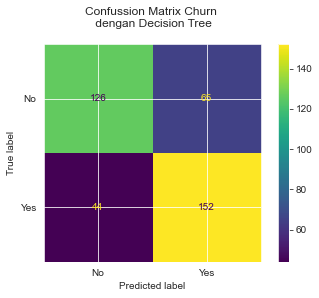

In [36]:
print('Confusion Matrix dari Model Decision Tree \n\n', plot_confusion_matrix(dtree, X_test, y_test))
plt.title('Confussion Matrix Churn \n dengan Decision Tree\n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print('Laporan AUC Model Decision Tree')
print(auc(fpr, tpr))

Laporan AUC Model Decision Tree
0.7175980339779889


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [39]:
rf_model = rf.fit(X_train, y_train) 

In [40]:
y_rf = rf.predict(X_test)

In [41]:
print('Hasil Klasifikasi Model Random Forest \n\n\n', classification_report(y_test, y_rf))

Hasil Klasifikasi Model Random Forest 


               precision    recall  f1-score   support

           0       0.84      0.85      0.84       191
           1       0.85      0.84      0.85       196

    accuracy                           0.84       387
   macro avg       0.85      0.85      0.84       387
weighted avg       0.85      0.84      0.84       387



Confusion Matrix dari Model Random Forest 



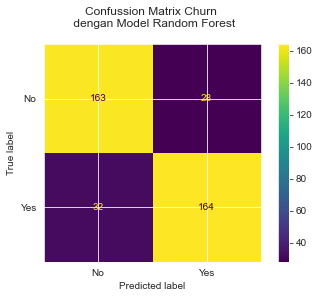

In [42]:
print('Confusion Matrix dari Model Random Forest \n\n', plot_confusion_matrix(rf_model, X_test, y_test))
plt.title('Confussion Matrix Churn \n dengan Model Random Forest\n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print('Laporan AUC Model Random Forest')
print(auc(fpr, tpr))

Laporan AUC Model Random Forest
0.8450689176194038


### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [45]:
knn_model = knn.fit(X_train, y_train)

In [46]:
y_knn = knn.predict(X_test)

In [47]:
print('Hasil Klasifikasi Model Random Forest \n\n\n', classification_report(y_test, y_knn))

Hasil Klasifikasi Model Random Forest 


               precision    recall  f1-score   support

           0       0.59      0.66      0.62       191
           1       0.62      0.55      0.58       196

    accuracy                           0.60       387
   macro avg       0.60      0.60      0.60       387
weighted avg       0.60      0.60      0.60       387



Confusion Matrix dari Model KNN 



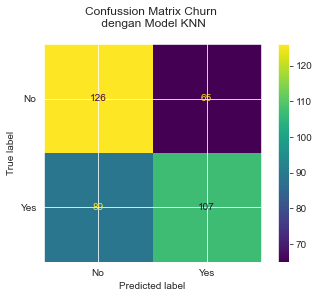

In [48]:
print('Confusion Matrix dari Model KNN \n\n', plot_confusion_matrix(knn_model, X_test, y_test))
plt.title('Confussion Matrix Churn \n dengan Model KNN\n')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_knn, pos_label=1) # pos_label: positive label
print('Laporan AUC Model Random Forest')
print(auc(fpr, tpr))

Laporan AUC Model Random Forest
0.6028021156106421


Jadi model terbaik adalah Random Forest.